### 引入数据分析包、导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = 'CDNOW_master.txt'
#列数重新命名
names = ['user_id','order_dt','order_product','order_amount']
data = pd.read_table(filename,names = names,sep='\s+')

In [3]:
data.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
data.describe()

,user_id,order_dt,order_product,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id          69659 non-null int64
order_dt         69659 non-null int64
order_product    69659 non-null int64
order_amount     69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
data['order_dt'] = pd.to_datetime(data.order_dt,format='%Y%m%d')
data['month'] = data.order_dt.values.astype('datetime64[M]')

In [7]:
data.head()

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


## 1.消费用户趋势的分析（按月）
- 每月消费总金额
- 每月消费次数
- 每月的产品购买量
- 每月的消费人数

In [10]:
grouped_month = data.groupby('month')
order_month_amount = grouped_month.order_amount.sum()
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

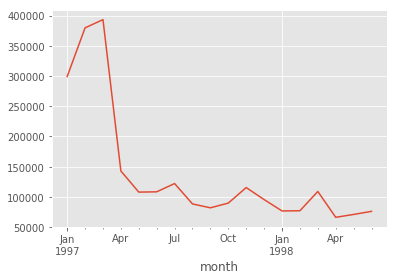

In [12]:
plt.style.use('ggplot')
order_month_amount.plot()

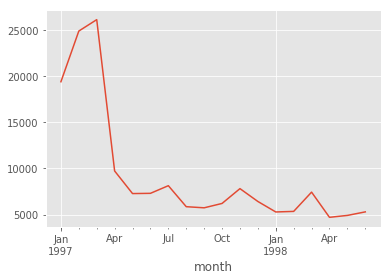

In [15]:
grouped_month.order_product.sum().plot()

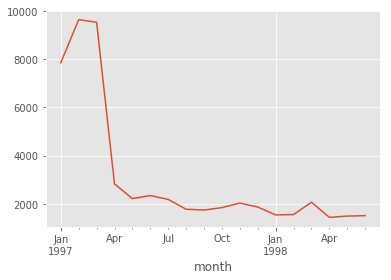

In [19]:
data_user = data.groupby('month').user_id.apply(lambda x : len(x.drop_duplicates()))
data_user.plot()

In [23]:
data.pivot_table(index = 'month',
                 values = ['order_product','order_amount','user_id'],
                 aggfunc = {'order_product':'sum',
                           'order_amount':'sum',
                           'user_id':'count'},).head()

,order_amount,order_product,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895


## 2.用户个体消费分析
- 用户消费金额，消费次数的描述统计
- 用户消费金额和消费的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [24]:
grouped_user = data.groupby('user_id')

In [25]:
grouped_user.sum().describe()

,order_product,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


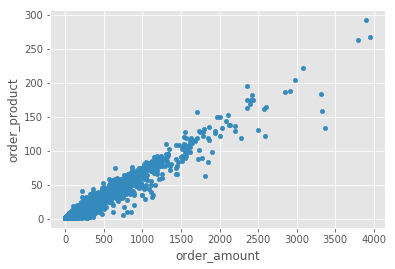

In [29]:
grouped_user.sum().query('order_amount<4000').plot.scatter(x= 'order_amount',y='order_product')

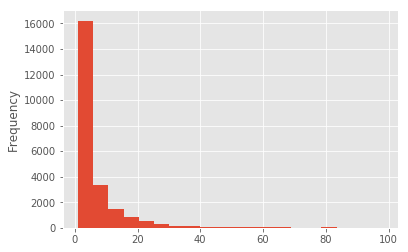

In [40]:
grouped_user.sum().query('order_product < 100').order_product.plot.hist(bins = 20)

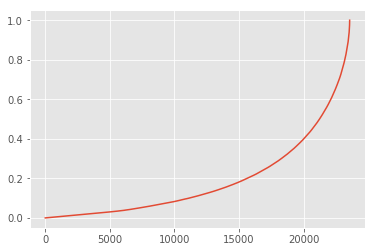

In [58]:
user_cumsum = grouped_user.sum().sort_values('order_amount').apply(lambda x : x.cumsum()/x.sum())
user_cumsum.reset_index().order_product.plot()

## 3.用户消费行为
- 用户第一次消费（首购）
- 用户最后一次消费
- 新老客消费比
    - 多少用户仅消费了一次
    - 每月新客占比
- 用户分层
    - RFM
    - 新、老、活跃、回流、流失
- 用户购买周期（按订单）
    - 用户消费周期描述
    - 用户消费周期分布
- 用户生命周期（按第一次&最后一次消费）
    - 用户生命周期描述
    - 用户生命周期分布

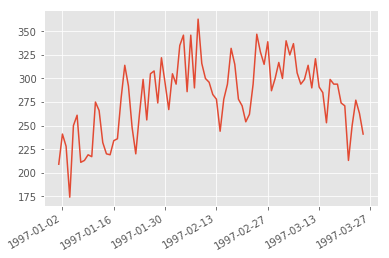

In [72]:
grouped_user.order_dt.min().value_counts().plot()

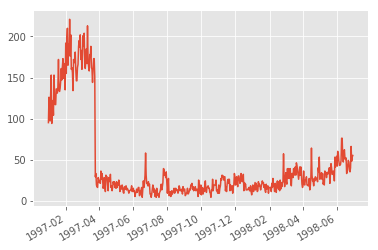

In [73]:
grouped_user.order_dt.max().value_counts().plot()

In [70]:
user_life = grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [71]:
(user_life['min'] == user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

In [ ]:
rfm = 